In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import quandl

In [2]:
aapl = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/aapl.csv", header=0, index_col= 0, names=['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], parse_dates=True)

In [3]:
aapl.head()

,Open,High,Low,Close,Volume,Adj Close
2006-10-02,75.10,75.87,74.30,74.860001,178159800.0,10.694285
2006-10-03,74.45,74.95,73.19,74.080002,197677200.0,10.582857
2006-10-04,74.10,75.46,73.16,75.380005,207270700.0,10.768572
2006-10-05,74.53,76.16,74.13,74.829994,170970800.0,10.690000
2006-10-06,74.42,75.04,73.81,74.220001,116739700.0,10.602858


In [4]:
print(aapl.index)
print(aapl.columns)
ts = aapl['Close'][-10:]
type(ts)

DatetimeIndex(['2006-10-02', '2006-10-03', '2006-10-04', '2006-10-05',
               '2006-10-06', '2006-10-09', '2006-10-10', '2006-10-11',
               '2006-10-12', '2006-10-13',
               ...
               '2011-12-16', '2011-12-19', '2011-12-20', '2011-12-21',
               '2011-12-22', '2011-12-23', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', length=1323, freq=None)
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


pandas.core.series.Series

In [5]:
print(aapl.loc[pd.Timestamp('2006-11-01'):pd.Timestamp('2006-12-31')].head())
print(aapl.loc['2007'].head())
print(aapl.iloc[22:43])
print(aapl.iloc[[22,43], [0, 3]])

             Open   High    Low      Close       Volume  Adj Close
2006-11-01  81.10  81.38  78.36  79.160004  152798100.0  11.308572
2006-11-02  78.92  79.32  78.50  78.979996  116370800.0  11.282857
2006-11-03  79.36  79.53  77.79  78.290001  107972200.0  11.184286
2006-11-06  78.95  80.06  78.43  79.709999  108644200.0  11.387143
2006-11-07  80.45  81.00  80.13  80.510002  131483100.0  11.501429
             Open   High    Low      Close       Volume  Adj Close
2007-01-03  86.29  86.58  81.90  83.800003  309579900.0  11.971429
2007-01-04  84.05  85.95  83.82  85.659996  211815100.0  12.237143
2007-01-05  85.77  86.20  84.40  85.049995  208685400.0  12.150000
2007-01-08  85.96  86.53  85.28  85.470001  199276700.0  12.210000
2007-01-09  86.45  92.98  85.15  92.570000  837324600.0  13.224286
             Open   High    Low      Close       Volume  Adj Close
2006-11-01  81.10  81.38  78.36  79.160004  152798100.0  11.308572
2006-11-02  78.92  79.32  78.50  78.979996  116370800.0  11.28

In [6]:
sample = aapl.sample(20)
print(sample)
monthly_aapl = aapl.resample('M')
print(monthly_aapl)

              Open    High     Low       Close       Volume  Adj Close
2008-05-06  184.66  187.12  182.18  186.660004  229717600.0  26.665714
2009-07-22  157.79  158.73  156.11  156.739990  218526000.0  22.391428
2007-08-14  128.29  128.30  123.71  124.029999  184751700.0  17.718571
2010-02-22  202.34  202.50  199.19  200.419998   97640900.0  28.631428
2011-07-13  358.33  360.00  356.38  358.019989   97909700.0  51.145714
2010-10-22  309.07  310.04  306.30  307.470001   93194500.0  43.924286
2008-10-16   99.77  103.43   91.74  101.889999  495130300.0  14.555715
2006-12-29   83.95   85.40   83.36   84.839996  269107300.0  12.120000
2007-07-16  138.39  139.98  137.50  138.099991  234028200.0  19.728571
2010-02-25  197.38  202.86  196.89  202.000000  166281500.0  28.857143
2009-01-21   79.39   82.88   79.31   82.830002  272317500.0  11.832857
2011-04-08  339.92  340.15  333.95  335.059998   94383800.0  47.865715
2009-10-14  192.25  192.32  190.23  191.289993   93877700.0  27.327143
2009-0

C:\Users\Neil Basu\AppData\Local\Temp\ipykernel_6772\3751154195.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aapl = aapl.resample('M')


In [7]:
aapl['diff'] = aapl.Open - aapl.Close

In [8]:
del aapl['diff']

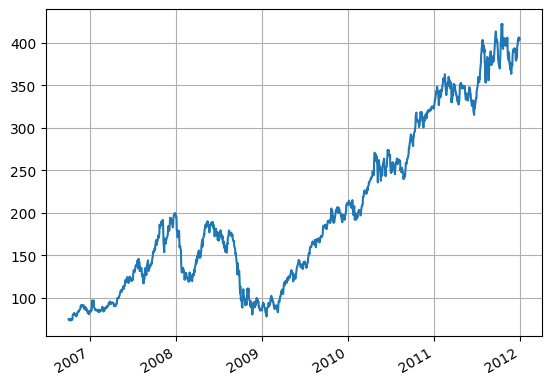

In [9]:
aapl['Close'].plot(grid=True)
plt.show()

In [11]:
daily_close = aapl[['Adj Close']]
daily_pct_c = daily_close.pct_change()
daily_pct_c.fillna(0, inplace=True)
print(daily_pct_c)
daily_log_returns = np.log(daily_close.pct_change() + 1)
print(daily_log_returns)

            Adj Close
2006-10-02   0.000000
2006-10-03  -0.010419
2006-10-04   0.017549
2006-10-05  -0.007296
2006-10-06  -0.008152
...               ...
2011-12-23   0.011993
2011-12-27   0.007934
2011-12-28  -0.009569
2011-12-29   0.006159
2011-12-30  -0.000296

[1323 rows x 1 columns]
            Adj Close
2006-10-02        NaN
2006-10-03  -0.010474
2006-10-04   0.017396
2006-10-05  -0.007323
2006-10-06  -0.008185
...               ...
2011-12-23   0.011922
2011-12-27   0.007903
2011-12-28  -0.009615
2011-12-29   0.006140
2011-12-30  -0.000296

[1323 rows x 1 columns]


In [12]:
monthly = aapl.resample('BM').apply(lambda x: x[-1])
monthly.pct_change()
quarter = aapl.resample('4M').mean()
quarter.pct_change()

C:\Users\Neil Basu\AppData\Local\Temp\ipykernel_6772\3368313673.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  monthly = aapl.resample('BM').apply(lambda x: x[-1])
C:\Users\Neil Basu\AppData\Local\Temp\ipykernel_6772\3368313673.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  monthly = aapl.resample('BM').apply(lambda x: x[-1])
C:\Users\Neil Basu\AppData\Local\Temp\ipykernel_6772\3368313673.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  quarter = aapl.resample('4M').mean()


,Open,High,Low,Close,Volume,Adj Close
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.125777,0.126451,0.121460,0.122860,0.369611,0.122860
2007-06-30,0.196030,0.195413,0.198331,0.197735,-0.080296,0.197735
2007-10-31,0.400961,0.404613,0.392010,0.400796,0.306882,0.400796
2008-02-29,0.127066,0.130711,0.117746,0.120394,0.172293,0.120394
2008-06-30,-0.003550,-0.004290,0.005927,0.003673,-0.209762,0.003673
2008-10-31,-0.114267,-0.108879,-0.124618,-0.118803,0.133219,-0.118803
2009-02-28,-0.363639,-0.363388,-0.359305,-0.360865,-0.161601,-0.360865
2009-06-30,0.312134,0.304359,0.324702,0.316588,-0.386935,0.316588
2009-10-31,0.421239,0.411193,0.425117,0.415901,-0.158270,0.415901


In [13]:
daily_pct_c = daily_close / daily_close.shift(1) - 1
print(daily_pct_c)

            Adj Close
2006-10-02        NaN
2006-10-03  -0.010419
2006-10-04   0.017549
2006-10-05  -0.007296
2006-10-06  -0.008152
...               ...
2011-12-23   0.011993
2011-12-27   0.007934
2011-12-28  -0.009569
2011-12-29   0.006159
2011-12-30  -0.000296

[1323 rows x 1 columns]


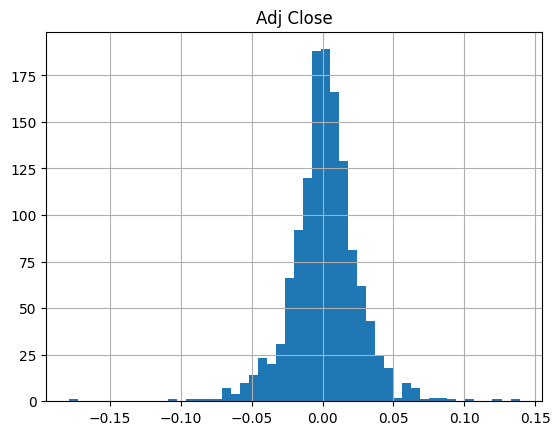

         Adj Close
count  1322.000000
mean      0.001566
std       0.023992
min      -0.179195
25%      -0.010672
50%       0.001677
75%       0.014306
max       0.139050


In [14]:
daily_pct_c.hist(bins=50)
plt.show()
print(daily_pct_c.describe())

In [15]:
cum_daily_return = (1 + daily_pct_c).cumprod()
print(cum_daily_return)

            Adj Close
2006-10-02        NaN
2006-10-03   0.989581
2006-10-04   1.006946
2006-10-05   0.999599
2006-10-06   0.991451
...               ...
2011-12-23   5.387791
2011-12-27   5.430537
2011-12-28   5.378574
2011-12-29   5.411702
2011-12-30   5.410099

[1323 rows x 1 columns]


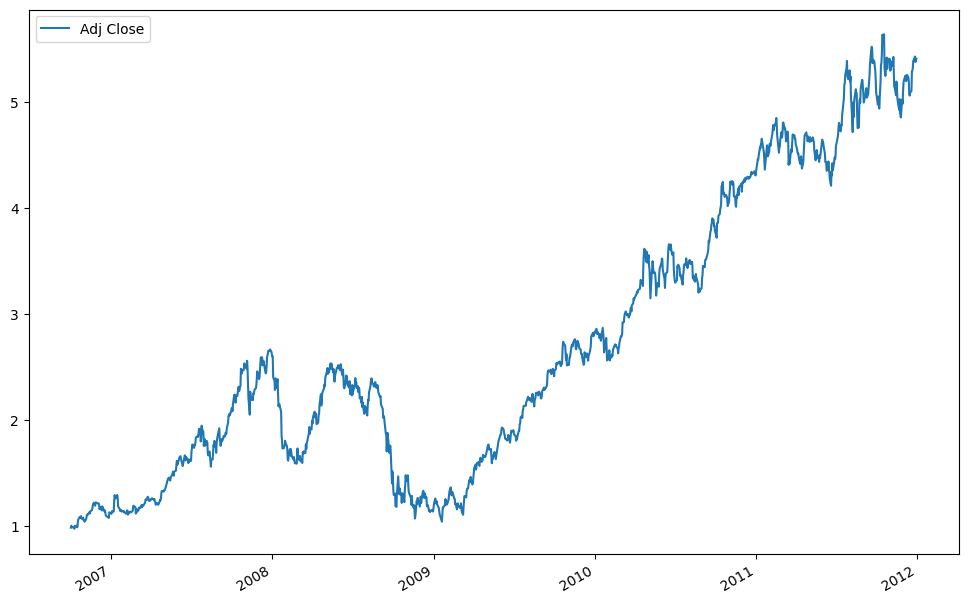

In [16]:
cum_daily_return.plot(figsize = (12, 8))
plt.show()

In [17]:
cum_monthly_return = cum_daily_return.resample('M').mean()
print(cum_monthly_return)

            Adj Close
2006-10-31   1.031710
2006-11-30   1.140058
2006-12-31   1.155110
2007-01-31   1.187303
2007-02-28   1.145176
...               ...
2011-08-31   5.032897
2011-09-30   5.243032
2011-10-31   5.306305
2011-11-30   5.140466
2011-12-31   5.248871

[63 rows x 1 columns]


C:\Users\Neil Basu\AppData\Local\Temp\ipykernel_6772\1748221143.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cum_monthly_return = cum_daily_return.resample('M').mean()


In [18]:
all_data = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/all_stock_data.csv", index_col= [0,1], header=0, parse_dates=[1])

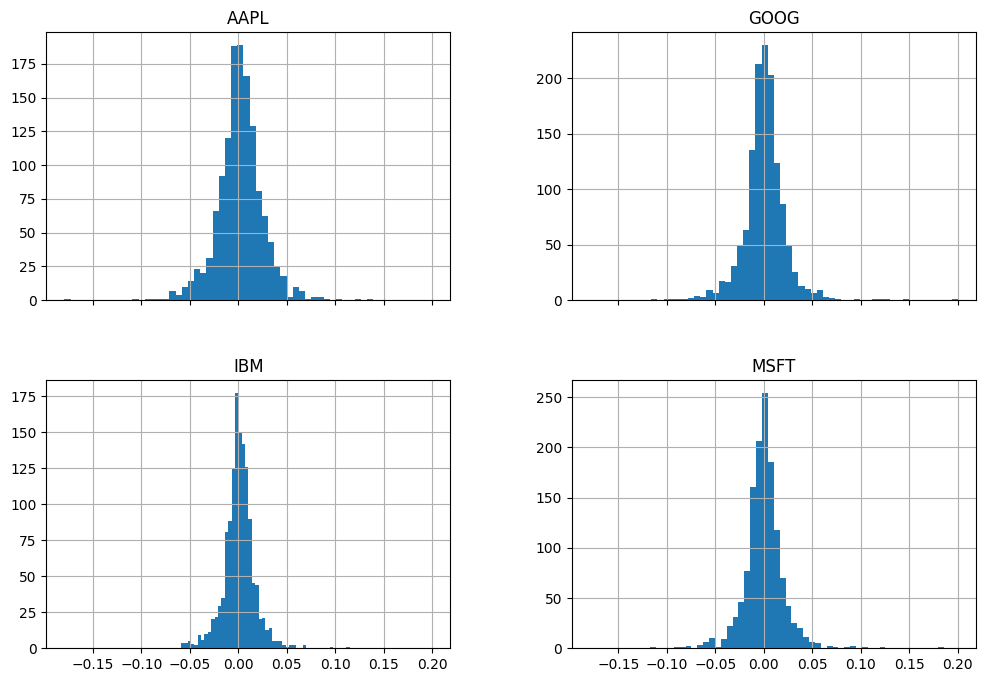

In [20]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot(index='Date', columns='Ticker', values='Adj Close')
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))
plt.show()

  Using cached scipy-1.15.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.15.1-cp312-cp312-win_amd64.whl (43.6 MB)
Note: you may need to restart the kernel to use updated packages.


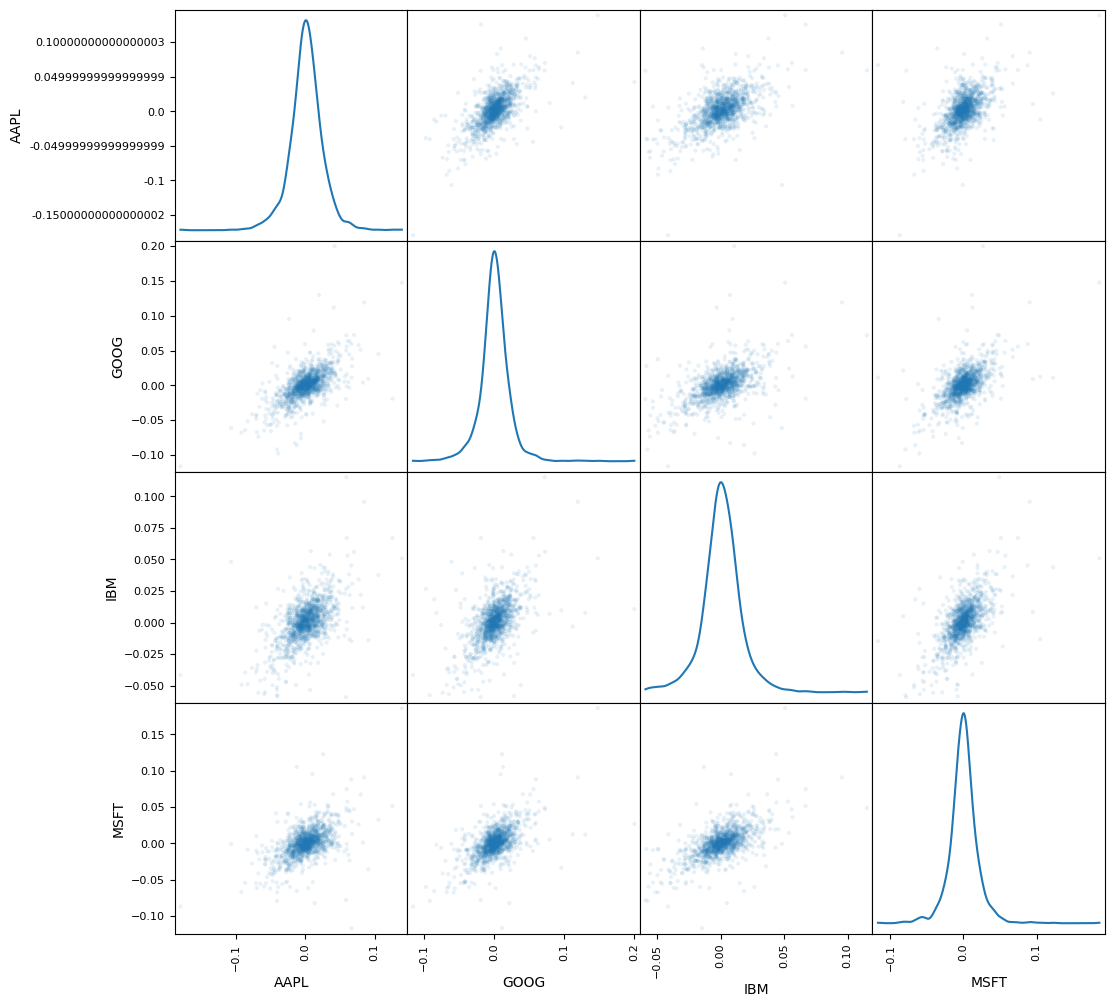

In [24]:
%pip install scipy
import scipy
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1, figsize=(12,12))
plt.show()

In [25]:
adj_close_px = aapl['Adj Close']
moving_avg = adj_close_px.rolling(window=40).mean()
moving_avg[-10:]

2011-12-16    55.529679
2011-12-19    55.491607
2011-12-20    55.456536
2011-12-21    55.451821
2011-12-22    55.444500
2011-12-23    55.439643
2011-12-27    55.445286
2011-12-28    55.437643
2011-12-29    55.468393
2011-12-30    55.495500
Name: Adj Close, dtype: float64

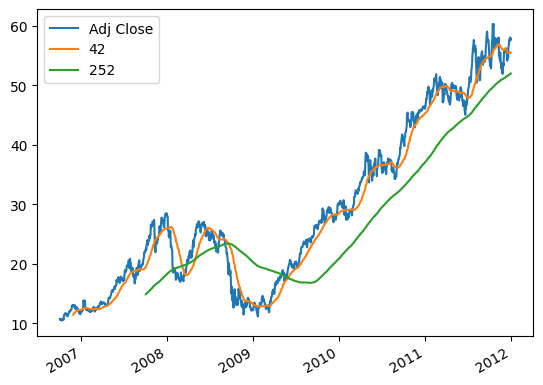

In [26]:
aapl['42'] = adj_close_px.rolling(window=40).mean()
aapl['252'] = adj_close_px.rolling(window=252).mean()
aapl[['Adj Close', '42', '252']].plot()
plt.show()

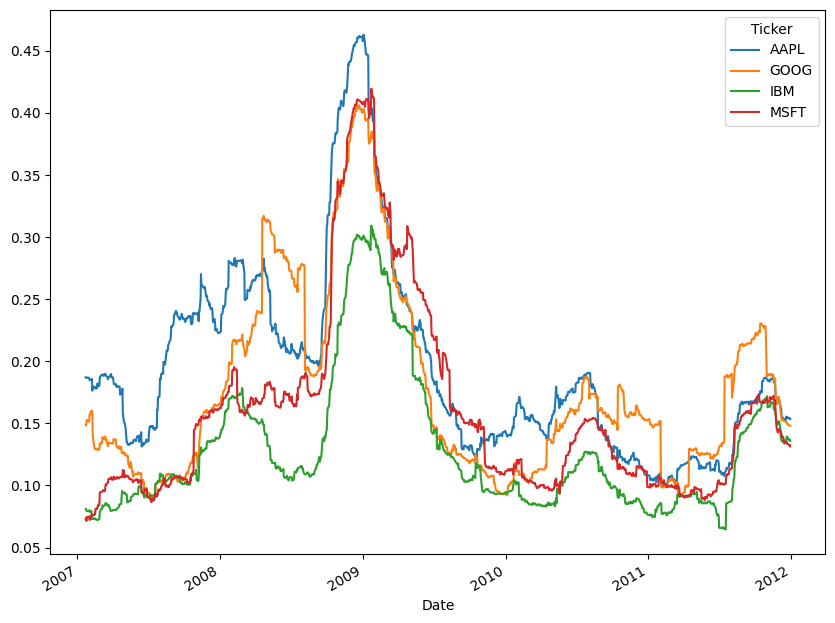

In [27]:
min_periods = 75
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods)
vol.plot(figsize=(10, 8))
plt.show()

In [28]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

C:\Users\Neil Basu\AppData\Local\Temp\ipykernel_6772\3080775594.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]


C:\Users\Neil Basu\AppData\Local\Temp\ipykernel_6772\3861779541.py:14: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax1.plot(signals.loc[signals.positions == 1.0].index,


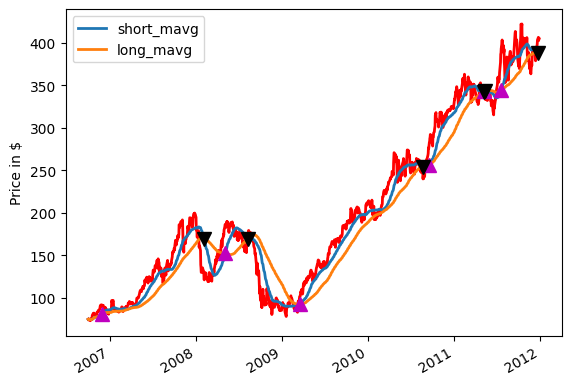

In [29]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

In [30]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

C:\Users\Neil Basu\AppData\Local\Temp\ipykernel_6772\2091070705.py:11: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax1.plot(portfolio.loc[signals.positions == 1.0].index,


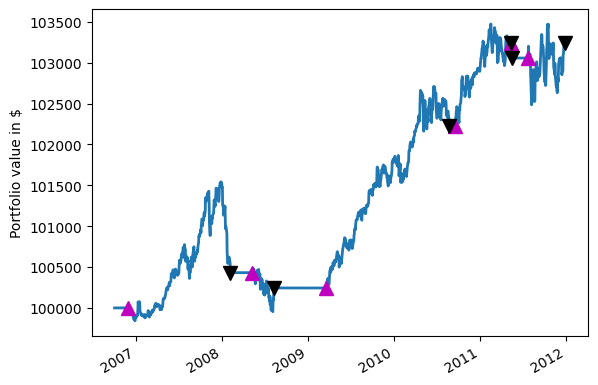

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [32]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.72687695001337


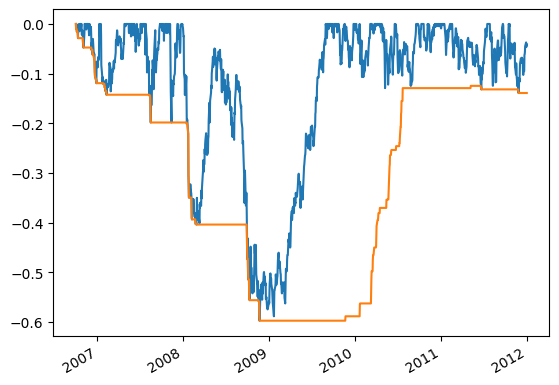

In [33]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = aapl['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

In [34]:
# Get the number of days in `aapl`
days = (aapl.index[-1] - aapl.index[0]).days

# Calculate the CAGR 
cagr = ((((aapl['Adj Close'][-1]) / aapl['Adj Close'][1])) ** (365.0/days)) - 1

# Print CAGR
print(cagr)

0.3823445620598196


C:\Users\Neil Basu\AppData\Local\Temp\ipykernel_6772\30074735.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cagr = ((((aapl['Adj Close'][-1]) / aapl['Adj Close'][1])) ** (365.0/days)) - 1
